In [1]:
import numpy as np
import matplotlib.pyplot as plt 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
import os 
import h5py
import sys
%matplotlib inline 

In [2]:
model_name = "3Layers_Scaling_Faster.h5py"

In [3]:
# Throw away lepton mass 
# os.chdir('./../../../../../data/hongtao')
be = h5py.File('./../../../../../data/hongtao/variables_tt_re.h5','r')
bmu = h5py.File('./../../../../../data/hongtao/variables_tt_rmu.h5','r')
be1 = h5py.File('./../../../../../data/hongtao/variables_tt_re1.h5','r')
print(be.keys())
print('')
print(be1.keys())
dataset = be1

<KeysViewHDF5 ['j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt', 'j8_eta', 'j8_isbtag', 'j8_m', 'j8_phi', 'j8_pt', 'lep_eta', 'lep_m', 'lep_phi', 'lep_pt', 'met_met', 'met_phi', 'mttReco', 'mttTrue']>

<KeysViewHDF5 ['bh_eta', 'bh_phi', 'bh_pt', 'bl_eta', 'bl_phi', 'bl_pt', 'j1_DL1r', 'j1_eta', 'j1_isbtag', 'j1_m', 'j1_phi', 'j1_pt', 'j2_DL1r', 'j2_eta', 'j2_isbtag', 'j2_m', 'j2_phi', 'j2_pt', 'j3_DL1r', 'j3_eta', 'j3_isbtag', 'j3_m', 'j3_phi', 'j3_pt', 'j4_DL1r', 'j4_eta', 'j4_isbtag', 'j4_m', 'j4_phi', 'j4_pt', 'j5_DL1r', 'j5_eta', 'j5_isbtag', 'j5_m', 'j5_phi', 'j5_pt', 'j6_DL1r', 'j6_eta', 'j6_isbtag', 'j6_m', 'j6_phi', 'j6_pt', 'j7_DL1r', 'j7_eta', 'j7_isbtag', 'j7_m', 'j7_phi', 'j7_pt'

In [4]:
input_keys = ['j1_pt', 'j1_eta', 'j1_phi', 'j1_m', 'j1_DL1r', 'j2_pt', 'j2_eta', 'j2_phi', 'j2_m', 'j2_DL1r', 'j3_pt', 'j3_eta', 'j3_phi', 'j3_m', 'j3_DL1r', 'j4_pt', 'j4_eta', 'j4_phi', 'j4_m', 'j4_DL1r', 'j5_pt', 'j5_eta', 'j5_phi', 'j5_m', 'j5_DL1r', 'j6_pt', 'j6_eta', 'j6_phi', 'j6_m', 'j6_DL1r', 'j7_pt', 'j7_eta', 'j7_phi','j7_m', 'j7_DL1r', 'j8_pt', 'j8_eta', 'j8_phi','j8_m', 'j8_DL1r', 'lep_pt', 'lep_eta', 'lep_phi', 'met_met', 'met_phi'] 
output_keys = ['th_pt', 'th_eta','th_phi', 'tl_pt', 'tl_eta', 'tl_phi']
# output_keys = ['th_eta','th_phi', 'tl_eta', 'tl_phi']

output_length = len(output_keys)
input_length = len(input_keys)

In [5]:
# plt.figure(figsize=(8,8*input_length))
# for i in range(0, input_length):
#     plt.subplot(input_length, 1, i+1)
#     histo, bin_edges = np.histogram(dataset.get(input_keys[i]))
#     plt.hist(dataset.get(input_keys[i]), bin_edges, histtype='step')
#     plt.xlabel(input_keys[i])
#     plt.ylabel('Frequency')

(array([432341., 439423., 444292., 445645., 442098., 437930., 432495.,
        429988., 428128., 428529.]),
 array([-0.98962464, -0.79066217, -0.59169971, -0.39273724, -0.19377478,
         0.00518768,  0.20415015,  0.40311261,  0.60207507,  0.80103754,
         1.        ]),
 <a list of 1 Patch objects>)

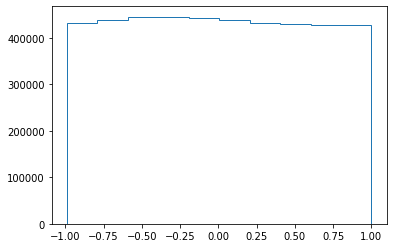

In [6]:
i = 'met_phi' 
var = dataset.get(i)
v2 = var-np.mean(var)
v3 = v2/np.max(v2)
plt.hist(v3, histtype='step')

In [7]:
# Convert into numpy arrays and mean normalize
crop =  100000

input_arrays = []
output_arrays = [] 
in_max = []
in_mean = []
out_max = []
out_mean = []

# for key in input_keys:
#     exec(key + ' = np.array(dataset.get(key))[0:crop].reshape((1,-1))')
#     exec('{0} = ({0} - np.mean({0}))/np.std({0})'.format(key))
#     exec('input_arrays.append({0})'.format(key))

    
def convert_normalize(keys, maxim, mean, total):
    for x in keys:
        var = np.array(dataset.get(x))[0:crop]
        mu = np.mean(var)
        var = (var - mu)
        maxi = np.max(np.abs(var))
        var = var/maxi
        total.append(var)
        maxim.append(maxi)
        mean.append(mu)

    
convert_normalize(input_keys, in_max, in_mean, input_arrays)
convert_normalize(output_keys, out_max, out_mean, output_arrays)

out_max = np.array(out_max).reshape((1,-1))
out_mean = np.array(out_mean).reshape((1,-1))
in_max = np.array(in_max).reshape((1,-1))
in_mean = np.array(in_mean).reshape((1,-1))

In [8]:
# Create input and test array
split = int(np.floor(0.8*crop)) # 80/20 split 
shuffle = False

total_input = np.stack(input_arrays,axis=0).T
total_output = np.stack(output_arrays,axis=0).T
if shuffle:
    rng_state = np.random.get_state()
    np.random.shuffle(total_input)
    np.random.set_state(rng_state)
    np.random.shuffle(total_output)
    
# size = total_input.shape
# total_input = np.array(np.random.normal(size=total_input.shape))

train_input, test_input = total_input[0:split, :], total_input[split:,:]
train_output, test_output = total_output[0:split,:], total_output[split:,:]

In [9]:
print(train_input.shape, train_output.shape)
print(test_input.shape, test_output.shape)

(80000, 45) (80000, 6)
(20000, 45) (20000, 6)


In [10]:
# Histograms 
show = False 

if show:
    plt.figure(figsize=(8,8*input_length))
    for i in range(0, input_length):
        plt.subplot(input_length, 1, i+1)
        plt.hist(train_input[:,i], histtype='step')
        plt.xlabel(input_keys[i])
        plt.ylabel('Frequency')

 

In [11]:
# Build model

# optimizer = keras.optimizers.RMSprop(learning_rate = 1e-5)
optimizer = keras.optimizers.Adam(learning_rate=1e-5)
callback = keras.callbacks.EarlyStopping(monitor='val_loss', patience=3)


def build_model():
    model = keras.Sequential([
        layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.0001),
                     input_shape=[len(input_keys)]),
        layers.Dense(128,  activation='relu'),
        layers.Dense(64, activation='relu'),
        layers.Dense(len(output_keys),  activation='linear')
    ])
    
    model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    return model 

# def build_model():
#     model = keras.Sequential([
#         layers.Dense(6, activation='linear', 
#                      input_shape=[len(input_keys)])])
    
#     model.compile(loss='mse', optimizer= optimizer, metrics=['mse'])
    
#     return model 
    

In [12]:
model = build_model()
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 128)               5888      
_________________________________________________________________
dense_1 (Dense)              (None, 128)               16512     
_________________________________________________________________
dense_2 (Dense)              (None, 64)                8256      
_________________________________________________________________
dense_3 (Dense)              (None, 6)                 390       
Total params: 31,046
Trainable params: 31,046
Non-trainable params: 0
_________________________________________________________________


In [13]:
# Fit model

Epochs= 8192

history = model.fit(train_input, train_output, verbose=1, epochs=Epochs, 
                   validation_split=0.2, shuffle=True, callbacks=[callback],
                   batch_size=512)


Epoch 1/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.1484 - mse: 0.1418 - val_loss: 0.1437 - val_mse: 0.1371
Epoch 2/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.1401 - mse: 0.1336 - val_loss: 0.1373 - val_mse: 0.1308
Epoch 3/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.1345 - mse: 0.1280 - val_loss: 0.1324 - val_mse: 0.1259
Epoch 4/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.1298 - mse: 0.1233 - val_loss: 0.1281 - val_mse: 0.1217
Epoch 5/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.1256 - mse: 0.1191 - val_loss: 0.1242 - val_mse: 0.1178
Epoch 6/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.1217 - mse: 0.1153 - val_loss: 0.1207 - val_mse: 0.1143
Epoch 7/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.1182 - mse: 0.1118 - val_loss: 0.1176 - val_mse: 0.1112
Epoch 8/8192
125/125 [==============================] - 0s 4ms

Epoch 62/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0927 - mse: 0.0875 - val_loss: 0.0953 - val_mse: 0.0902
Epoch 63/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0925 - mse: 0.0874 - val_loss: 0.0952 - val_mse: 0.0901
Epoch 64/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0924 - mse: 0.0873 - val_loss: 0.0950 - val_mse: 0.0900
Epoch 65/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0923 - mse: 0.0872 - val_loss: 0.0949 - val_mse: 0.0899
Epoch 66/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0922 - mse: 0.0871 - val_loss: 0.0948 - val_mse: 0.0898
Epoch 67/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0920 - mse: 0.0870 - val_loss: 0.0947 - val_mse: 0.0897
Epoch 68/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0919 - mse: 0.0869 - val_loss: 0.0946 - val_mse: 0.0896
Epoch 69/8192
125/125 [==============================] 

125/125 [==============================] - 0s 4ms/step - loss: 0.0870 - mse: 0.0827 - val_loss: 0.0902 - val_mse: 0.0860
Epoch 123/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0869 - mse: 0.0827 - val_loss: 0.0902 - val_mse: 0.0859
Epoch 124/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0868 - mse: 0.0826 - val_loss: 0.0901 - val_mse: 0.0859
Epoch 125/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0868 - mse: 0.0826 - val_loss: 0.0900 - val_mse: 0.0858
Epoch 126/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0867 - mse: 0.0825 - val_loss: 0.0900 - val_mse: 0.0858
Epoch 127/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0866 - mse: 0.0824 - val_loss: 0.0899 - val_mse: 0.0857
Epoch 128/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0865 - mse: 0.0824 - val_loss: 0.0898 - val_mse: 0.0857
Epoch 129/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0828 - mse: 0.0791 - val_loss: 0.0865 - val_mse: 0.0828
Epoch 183/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0827 - mse: 0.0790 - val_loss: 0.0864 - val_mse: 0.0827
Epoch 184/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0827 - mse: 0.0789 - val_loss: 0.0864 - val_mse: 0.0827
Epoch 185/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0826 - mse: 0.0789 - val_loss: 0.0864 - val_mse: 0.0827
Epoch 186/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0826 - mse: 0.0788 - val_loss: 0.0863 - val_mse: 0.0826
Epoch 187/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0825 - mse: 0.0788 - val_loss: 0.0862 - val_mse: 0.0825
Epoch 188/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0824 - mse: 0.0787 - val_loss: 0.0862 - val_mse: 0.0825
Epoch 189/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0797 - mse: 0.0763 - val_loss: 0.0839 - val_mse: 0.0805
Epoch 243/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0797 - mse: 0.0762 - val_loss: 0.0839 - val_mse: 0.0804
Epoch 244/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0796 - mse: 0.0762 - val_loss: 0.0838 - val_mse: 0.0804
Epoch 245/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0796 - mse: 0.0762 - val_loss: 0.0838 - val_mse: 0.0803
Epoch 246/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0795 - mse: 0.0761 - val_loss: 0.0837 - val_mse: 0.0803
Epoch 247/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0795 - mse: 0.0761 - val_loss: 0.0837 - val_mse: 0.0803
Epoch 248/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0795 - mse: 0.0761 - val_loss: 0.0837 - val_mse: 0.0803
Epoch 249/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0775 - mse: 0.0743 - val_loss: 0.0822 - val_mse: 0.0790
Epoch 303/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0775 - mse: 0.0743 - val_loss: 0.0822 - val_mse: 0.0790
Epoch 304/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0775 - mse: 0.0742 - val_loss: 0.0822 - val_mse: 0.0790
Epoch 305/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0774 - mse: 0.0742 - val_loss: 0.0822 - val_mse: 0.0790
Epoch 306/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0774 - mse: 0.0742 - val_loss: 0.0821 - val_mse: 0.0789
Epoch 307/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0774 - mse: 0.0742 - val_loss: 0.0821 - val_mse: 0.0789
Epoch 308/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0773 - mse: 0.0741 - val_loss: 0.0821 - val_mse: 0.0789
Epoch 309/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0759 - mse: 0.0728 - val_loss: 0.0811 - val_mse: 0.0780
Epoch 363/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0759 - mse: 0.0728 - val_loss: 0.0811 - val_mse: 0.0780
Epoch 364/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0758 - mse: 0.0728 - val_loss: 0.0811 - val_mse: 0.0780
Epoch 365/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0758 - mse: 0.0728 - val_loss: 0.0810 - val_mse: 0.0780
Epoch 366/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0758 - mse: 0.0727 - val_loss: 0.0810 - val_mse: 0.0780
Epoch 367/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0758 - mse: 0.0727 - val_loss: 0.0810 - val_mse: 0.0780
Epoch 368/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0757 - mse: 0.0727 - val_loss: 0.0810 - val_mse: 0.0779
Epoch 369/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0746 - mse: 0.0716 - val_loss: 0.0803 - val_mse: 0.0774
Epoch 423/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0746 - mse: 0.0716 - val_loss: 0.0803 - val_mse: 0.0774
Epoch 424/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0745 - mse: 0.0716 - val_loss: 0.0803 - val_mse: 0.0774
Epoch 425/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0745 - mse: 0.0716 - val_loss: 0.0803 - val_mse: 0.0773
Epoch 426/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0745 - mse: 0.0716 - val_loss: 0.0802 - val_mse: 0.0773
Epoch 427/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0745 - mse: 0.0715 - val_loss: 0.0802 - val_mse: 0.0773
Epoch 428/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0744 - mse: 0.0715 - val_loss: 0.0802 - val_mse: 0.0773
Epoch 429/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 0s 4ms/step - loss: 0.0735 - mse: 0.0706 - val_loss: 0.0797 - val_mse: 0.0769
Epoch 483/8192
125/125 [==============================] - 1s 5ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0797 - val_mse: 0.0769
Epoch 484/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0797 - val_mse: 0.0769
Epoch 485/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0797 - val_mse: 0.0769
Epoch 486/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0796 - val_mse: 0.0768
Epoch 487/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0797 - val_mse: 0.0768
Epoch 488/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0734 - mse: 0.0706 - val_loss: 0.0796 - val_mse: 0.0768
Epoch 489/8192
125/125 [==============================] - 0s 4m

125/125 [==============================] - 1s 4ms/step - loss: 0.0725 - mse: 0.0698 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 543/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0725 - mse: 0.0698 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 544/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0725 - mse: 0.0698 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 545/8192
125/125 [==============================] - 1s 4ms/step - loss: 0.0725 - mse: 0.0698 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 546/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0725 - mse: 0.0698 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 547/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0725 - mse: 0.0697 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 548/8192
125/125 [==============================] - 0s 4ms/step - loss: 0.0724 - mse: 0.0697 - val_loss: 0.0792 - val_mse: 0.0765
Epoch 549/8192
125/125 [==============================] - 0s 4m

In [14]:
history.history.keys()
model.save(model_name)

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
INFO:tensorflow:Assets written to: 3Layers_Scaling_Faster.h5py/assets


Text(0.5, 1.0, 'MSE loss')

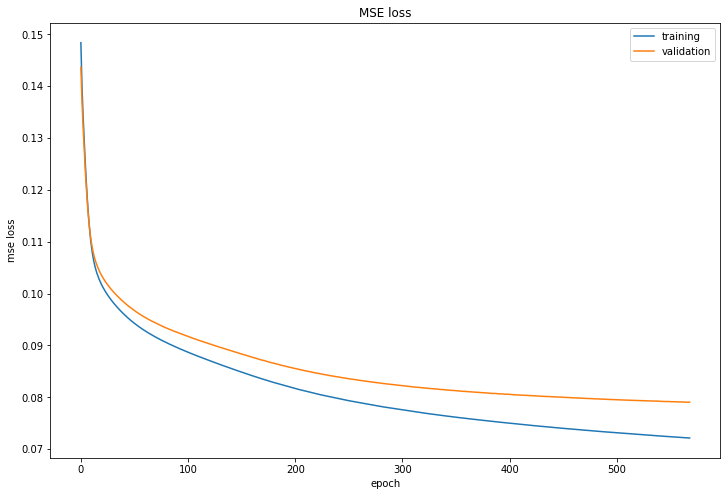

In [15]:
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'], label='training')
plt.plot(history.history['val_loss'], label='validation')
plt.xlabel('epoch')
plt.ylabel('mse loss')
plt.legend()
plt.title('MSE loss')

In [16]:
predictions = model.predict(test_input)

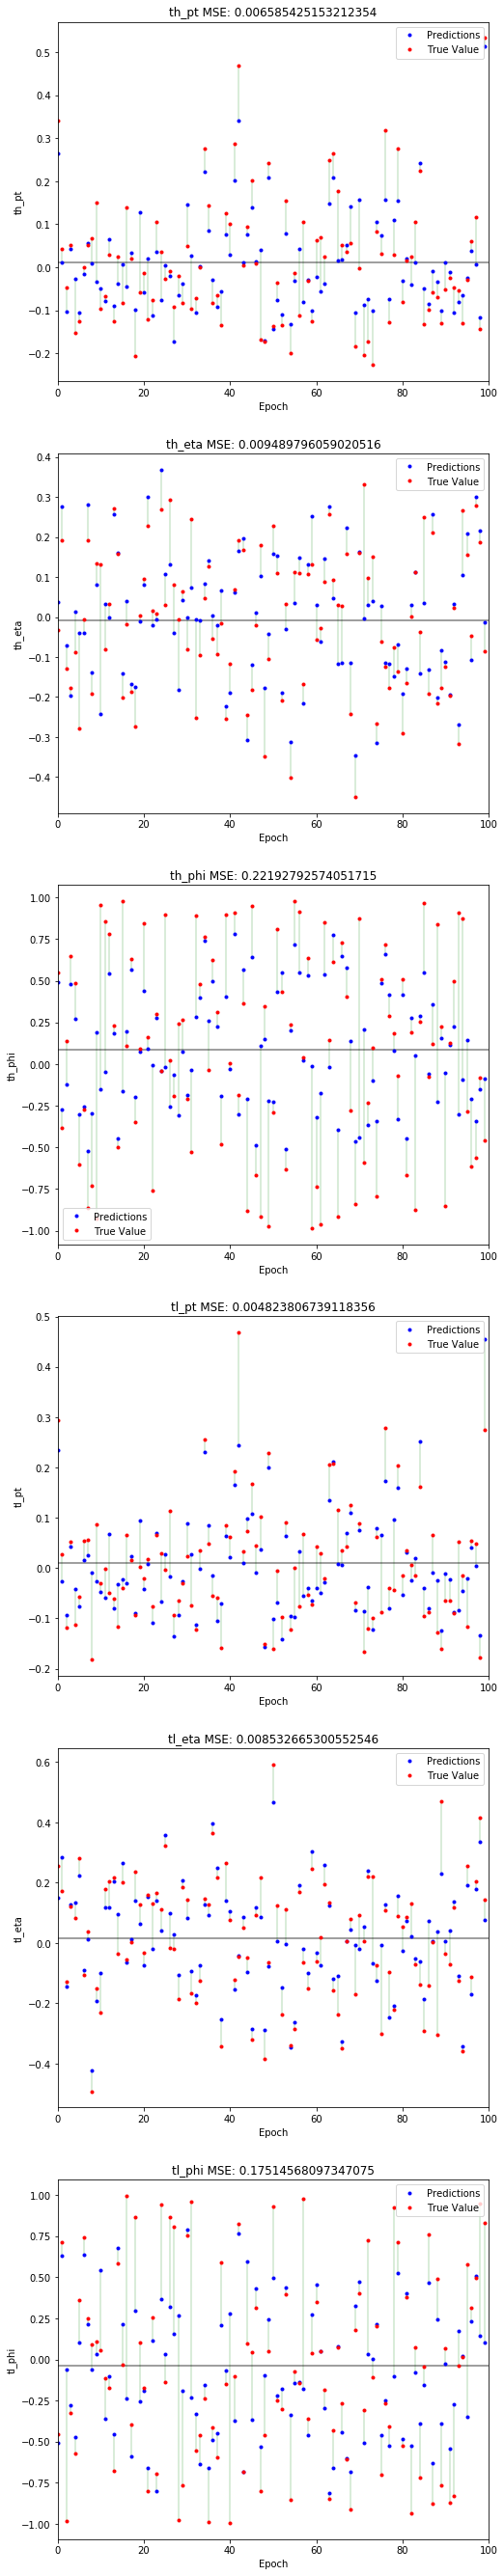

In [17]:
# Training 
crop = 100 

train_small = model.predict(train_input[0:100,:])
output_small = train_output[0:100,:]

def comparison_plot(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0,output_length):
        plt.subplot(output_length,1,i+1)
        plt.plot(range(0,crop), compare[:,i], 'bo', markersize=3, label = 'Predictions')
        plt.plot(range(0,crop), true[:,i], 'ro', markersize=3, label = 'True Value')
        ym, yM = plt.ylim()
        for x in range(100):
            plt.vlines(x, color='g', linestyle='-', alpha=0.2, ymin= 
                        min(compare[x,i], true[x,i]), 
                        ymax= max(compare[x,i], true[x,i]))
        plt.hlines(np.mean(true[:,i]), xmin=-20, xmax=crop+20, alpha=0.5)
        MSE = 1/compare[:,i].size*np.sum((compare[:,i]- true[:,i])**2)
        plt.xlabel('Epoch')
        plt.ylabel(output_keys[i])
        plt.xlim(0, crop)
        plt.title(output_keys[i] + " MSE: " + str(MSE))
        plt.legend()

comparison_plot(train_small, output_small)

In [18]:
# Predictions

predictions_small = predictions[0:100,:]
test_output_small = test_output[0:100,:]

MSE = 1/predictions.size*np.sum((predictions- test_output)**2)
print("total MSE: " + str(MSE))

for i in range(output_length):
    MSE = 1/predictions[:,i].size*np.sum((predictions[:,i] -test_output[:,i])**2)
    print("{0} MSE : ".format(output_keys[i]), '%.10f'%MSE)

total MSE: 0.07386839457084261
th_pt MSE :  0.0076060430
th_eta MSE :  0.0133679309
th_phi MSE :  0.2166044188
tl_pt MSE :  0.0055768354
tl_eta MSE :  0.0111236186
tl_phi MSE :  0.1889315208


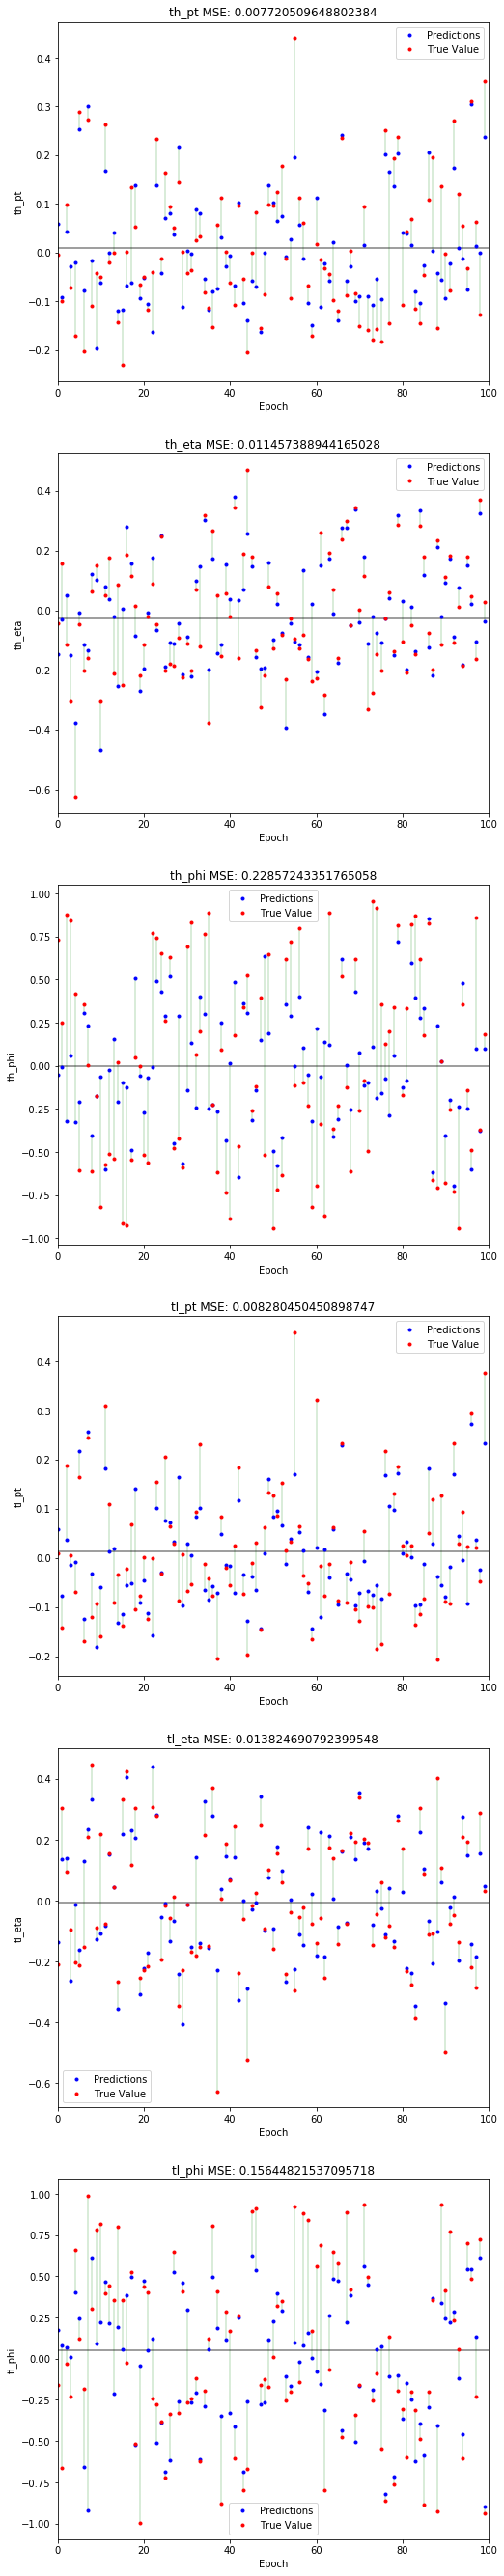

In [19]:
comparison_plot(predictions_small, test_output_small)

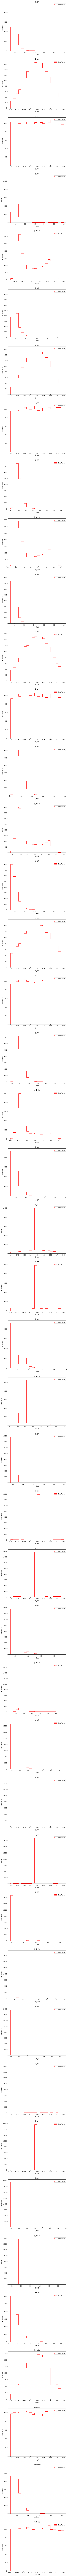

In [20]:
# # Histograms 

# def histograms_true(true):
#     plt.figure(figsize=(8,8*input_length))
#     for i in range(0, input_length):
#         plt.subplot(input_length,1,i+1)
#         histo, bin_edges = np.histogram(true[:,i],20)
#         plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
#         plt.xlabel(input_keys[i])
#         plt.ylabel('Frequency')
#         plt.title(input_keys[i])
#         plt.legend()

# histograms_true(test_input)

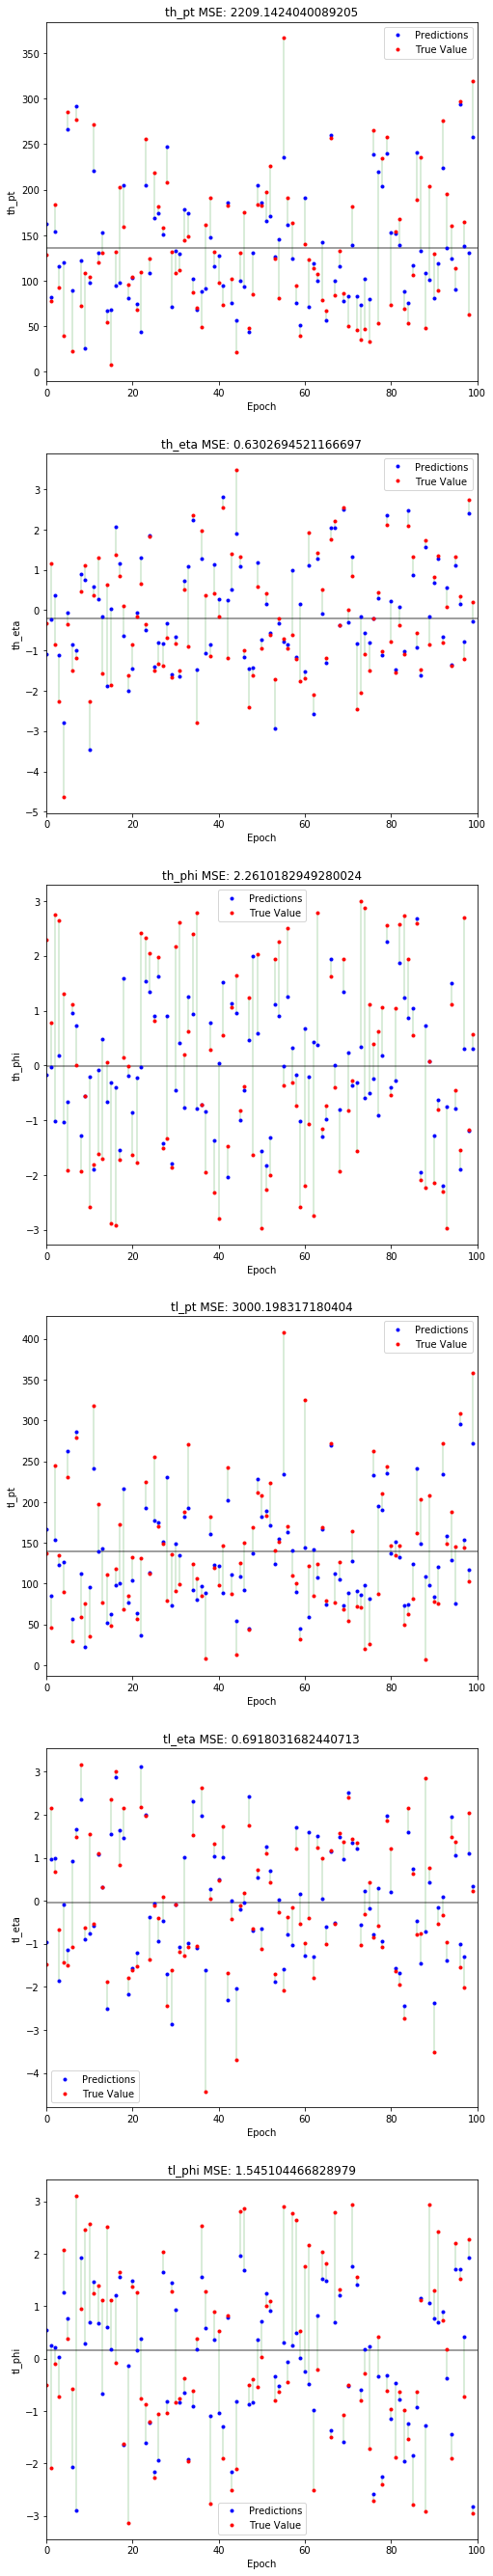

In [21]:
# Back to original units 

scaled_predictions = predictions*out_max + out_mean
scaled_output = test_output*out_max + out_mean

scaled_predictions_small = scaled_predictions[0:crop,:]
scaled_output_small = scaled_output[0:crop,:]

comparison_plot(scaled_predictions_small, scaled_output_small)

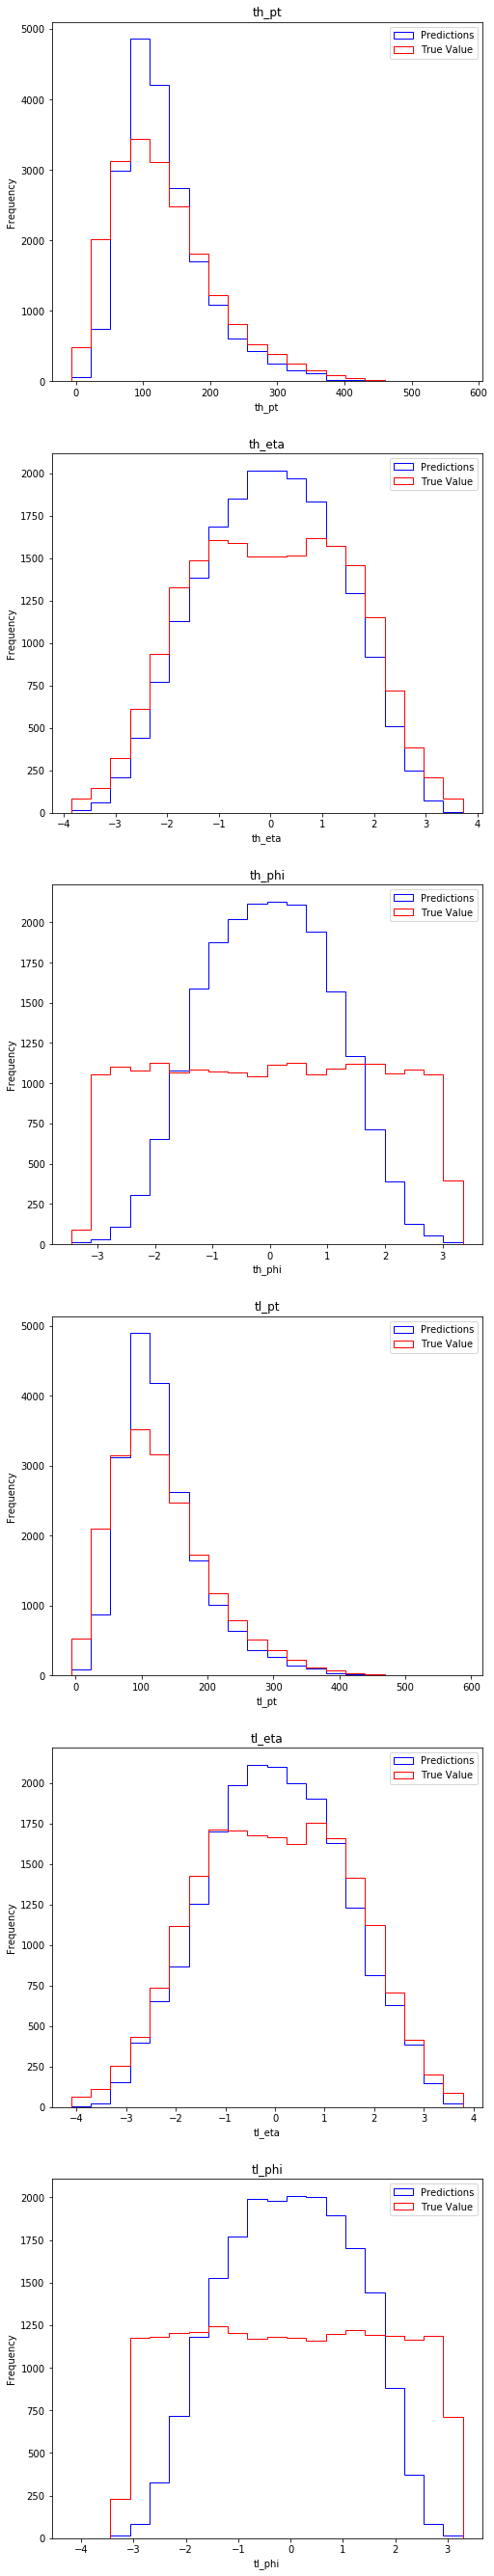

In [22]:
# Histograms 

def histograms(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(compare[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms(scaled_predictions, scaled_output)

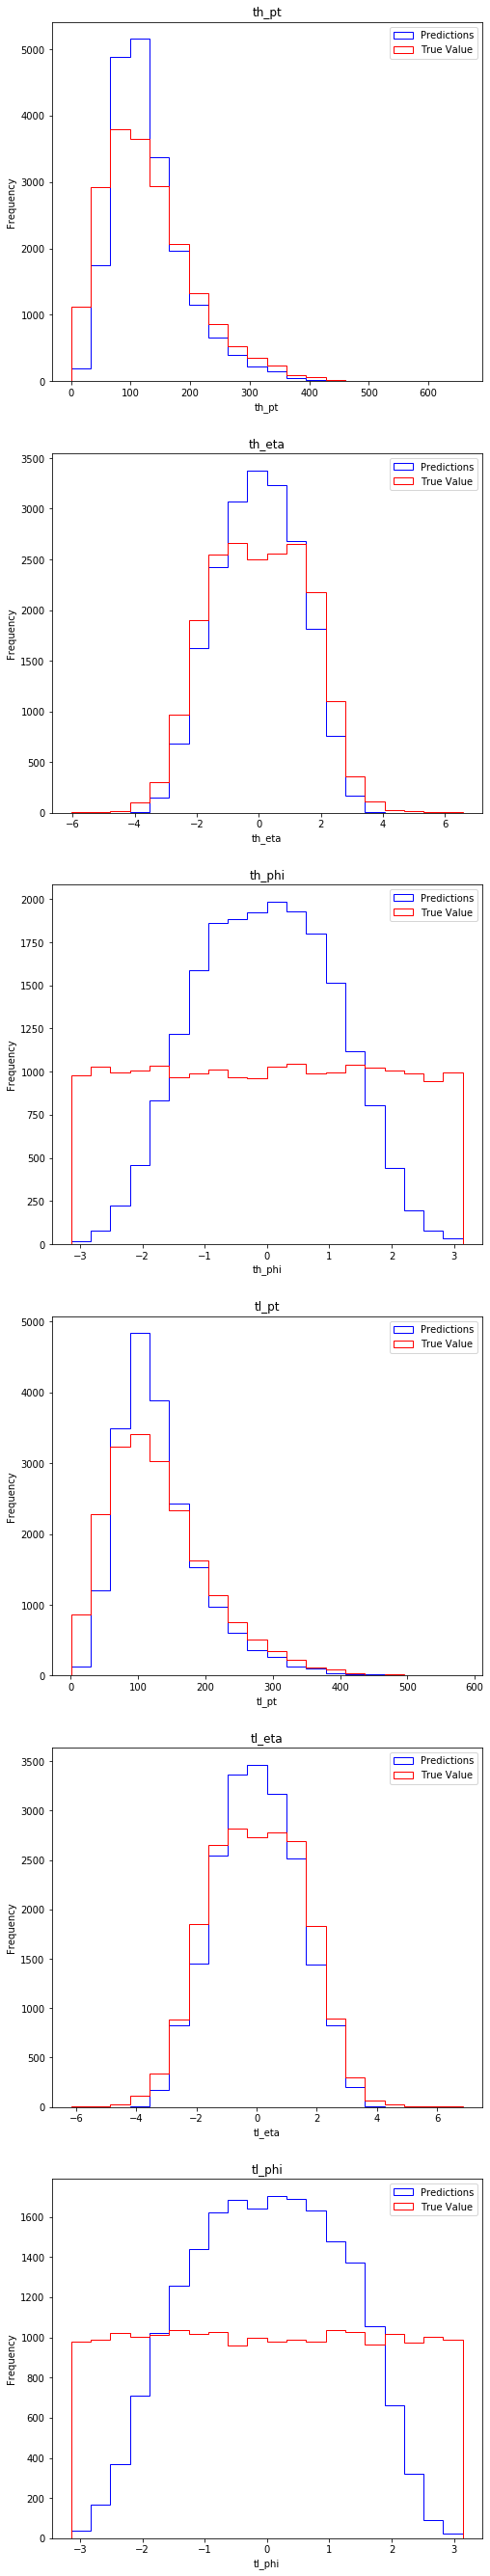

In [23]:
# Histograms 

def histograms_true(compare, true):
    plt.figure(figsize=(8,8*output_length))
    for i in range(0, output_length):
        plt.subplot(output_length,1,i+1)
        histo, bin_edges = np.histogram(true[:,i],20)
        plt.hist(compare[:,i], bin_edges, histtype = 'step', color='b', label='Predictions')
        plt.hist(true[:,i], bin_edges, histtype = 'step', color='r', label='True Value')
        plt.xlabel(output_keys[i])
        plt.ylabel('Frequency')
        plt.title(output_keys[i])
        plt.legend()

histograms_true(scaled_predictions, scaled_output)